In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
from using_kde.precision_recall import plot_precision as kde_precision, plot_recall as kde_recall

In [3]:
n = 1000
act = np.linspace(0, 1, num=n) + stats.norm.rvs(loc=0.0, scale=0.1, size=n)
pred = np.linspace(0, 1, num=n)

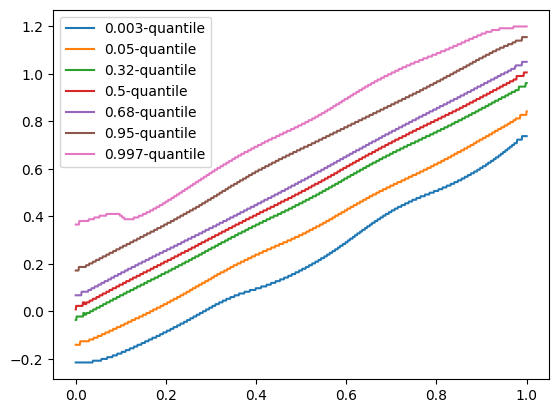

In [4]:
kde_precision(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.003, 0.05, 0.32, 0.5, 0.68, 0.95, 0.997])

29.7 s ± 204 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


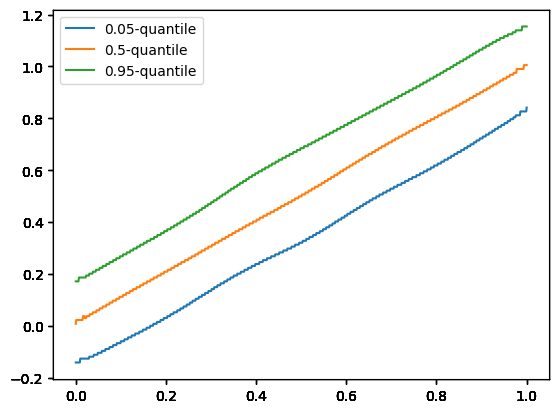

In [5]:
%timeit kde_precision(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.05, 0.5, 0.95])